In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"data\white_percentage_df.csv")

In [3]:
df['white_fraction_1'] = df['white_percentage_1'] / 100
df['white_fraction_2'] = df['white_percentage_2'] / 100

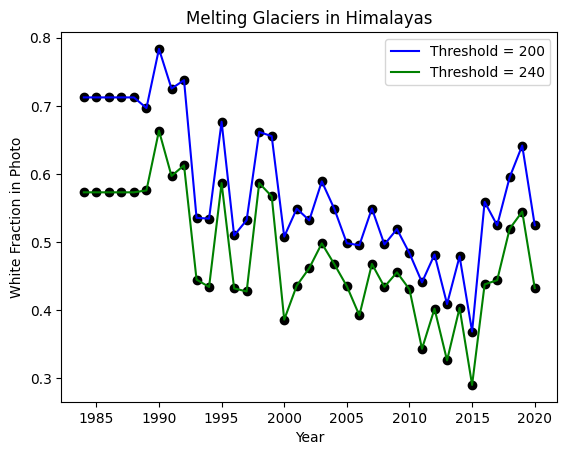

In [4]:
x = df['years']
y1= df['white_fraction_1']
y2= df['white_fraction_2']
plt.plot(x, y1, c = 'blue')
plt.plot(x, y2, c = 'green')
plt.scatter(x, y1, c = 'black')
plt.scatter(x, y2, c = 'black')
plt.xlabel("Year")
plt.ylabel("White Fraction in Photo")
plt.title("Melting Glaciers in Himalayas")
plt.legend(["Threshold = 200", "Threshold = 240"])
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result1 = adfuller(df['white_fraction_1'])

result1

# If p-value > 0.05, the series is not stationary

(-2.688850392569812,
 0.0759875901235154,
 0,
 36,
 {'1%': -3.626651907578875,
  '5%': -2.9459512825788754,
  '10%': -2.6116707716049383},
 -61.33292382511324)

In [6]:
import statsmodels.api as sm

#perform KPSS test
result2 = sm.tsa.stattools.kpss(df['white_fraction_1'], regression='ct')

result2

# If p-value < 0.05, the series is not stationary

(0.1488414310993529,
 0.04763214075053924,
 3,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

<Axes: >

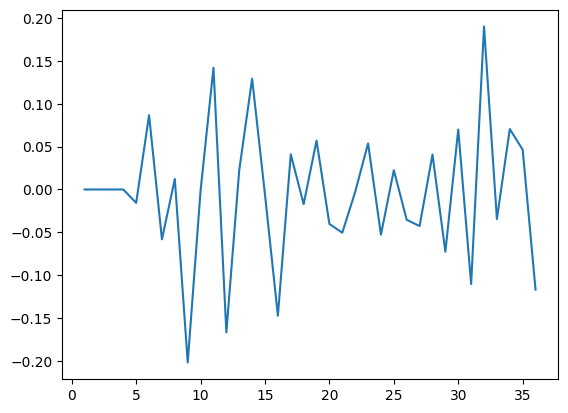

In [7]:
diff1 = df['white_fraction_1'].diff().dropna()
diff1.plot()

In [8]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result3 = adfuller(diff1)

result3

(-6.214765400392906,
 5.399320201663464e-08,
 1,
 34,
 {'1%': -3.639224104416853,
  '5%': -2.9512301791166293,
  '10%': -2.614446989619377},
 -58.00456353862893)

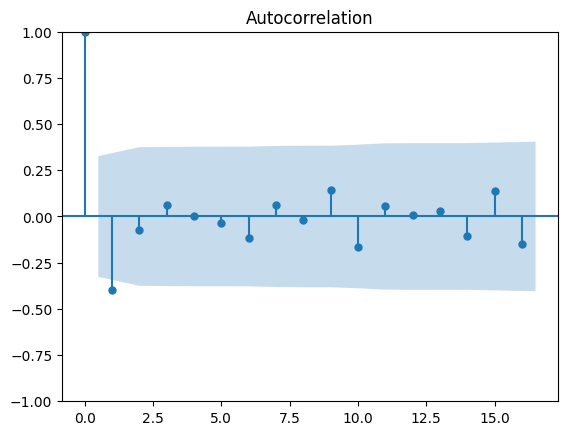

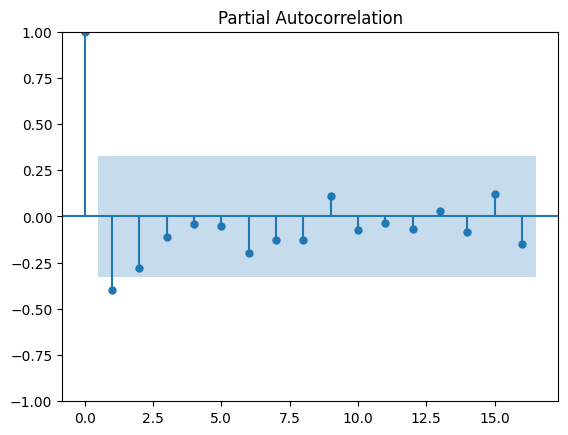

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(diff1)
pacf = plot_pacf(diff1)

In [10]:
train = df[:-5]
test = df[-5:]

In [11]:
from statsmodels.tsa.arima.model import ARIMA
import itertools
from sklearn.metrics import mean_squared_error as mse

p = q = range(0, 8)
d = [1,2]

# Generate all different combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))

rmse = []
params = []

for param in pdq:
    try:
        model = ARIMA(train['white_fraction_1'], order=param)
        model_fit = model.fit()
        model_pred = model_fit.predict(start = len(train), end = (len(df)-1))
        error = np.sqrt(mse(test['white_fraction_1'], model_pred))
        params.append(param)
        rmse.append(error)

    except:
        continue

results = pd.DataFrame(index = params, data = rmse, columns = ['RMSE'])

c:\Users\Pranav Koka\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Pranav Koka\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Pranav Koka\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Pranav Koka\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("

In [20]:
model = ARIMA(train['white_fraction_1'], order=(7,1,3))
model_fit = model.fit()

c:\Users\Pranav Koka\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [21]:
model_pred = model_fit.predict(start = len(train), end = (len(df)-1))
model_pred

32    0.434895
33    0.435682
34    0.429951
35    0.428515
36    0.419946
Name: predicted_mean, dtype: float64

In [22]:
test['white_fraction_1']

32    0.559071
33    0.524618
34    0.595228
35    0.641748
36    0.524778
Name: white_fraction_1, dtype: float64

In [23]:
error = np.sqrt(mse(test['white_fraction_1'], model_pred))
error

0.1463584777959245

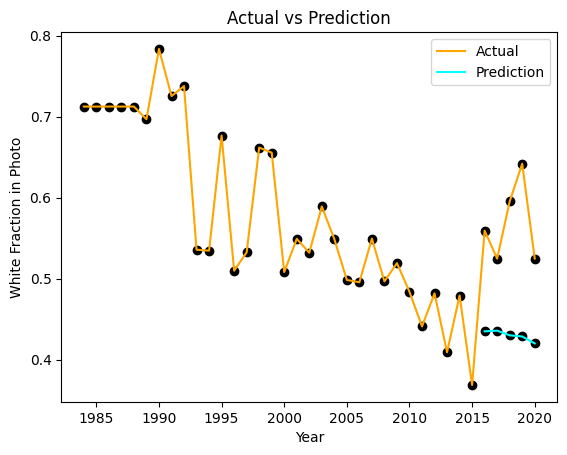

In [26]:
plt.plot(df['years'], df['white_fraction_1'], c = 'orange')
plt.plot(test['years'], model_pred, c = 'cyan')
plt.scatter(df['years'], df['white_fraction_1'], c = 'black')
plt.scatter(test['years'], model_pred, c = 'black')
plt.xlabel("Year")
plt.ylabel("White Fraction in Photo")
plt.title("Actual vs Prediction")
plt.legend(["Actual", "Prediction"])
plt.show()